# HW 1
The homework assignments is on calibrating the Inertial sensor in our cell phones via the 6-position method. The first part will be to use recorded data to calibrate the accelerometer, the second part will be to calibrate the gyroscopes and the third part will be to analyze recorded data of "shaking the smartphone". Finally, we will compare different phones with one another and with our expectations from their specifications. 


In [41]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../src')
from ins import Accelerometer
from ins import Gyroscope
from ins import Sensor
sys.path.append('../notebooks')
np.set_printoptions(precision=4, suppress=True)


# Load the data in new format
def load_data(person):
    for folder in os.listdir(os.path.join("..", "data", person)):
        df_name = f"{person.lower()}_{folder.lower().replace(' ', '_')}"
        if "Raw Data.csv" in os.listdir(os.path.join("..", "data", person, folder)):
            globals()[df_name] = pd.read_csv(os.path.join("..", "data", person, folder, "Raw Data.csv"))
            print(f"Loaded {df_name} in {folder}")
        elif "Accelerometer.csv" in os.listdir(os.path.join("..", "data", person, folder)):
            # This case means there is also gyroscope data
            globals()[df_name+"_accelerometer"] = pd.read_csv(os.path.join("..", "data", person, folder, "Accelerometer.csv"))
            print(f"Loaded {df_name}_accelerometer in {folder}")
            globals()[df_name+"_gyroscope"] = pd.read_csv(os.path.join("..", "data", person, folder, "Gyroscope.csv"))
            print(f"Loaded {df_name}_gyroscope in {folder}")
        else:
            print(f"Could not find data for {person} in {folder}")


def remove_rows_by_time(df, start_time, end_time):
    return df[(df["Time (s)"] >= start_time) & (df["Time (s)"] <= end_time)]

def get_mean_accelerations(df):
    return df[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])

def get_mean_gyroscopes(df):
    return df[["Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"]].mean().to_numpy().reshape([3,1])



## Elad

### Accelerometers

In [42]:
# Load the data in old format
path_accel_300sec_face_up = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_FaceUp")
path_accel_300sec_face_down = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_FaceDown")
path_accel_300sec_side_positive = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_SidePositive")
path_accel_300sec_side_negative = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_SideNegative")
path_accel_300sec_vertical_front = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_VerticalFront")
path_accel_300sec_vertical_back = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_VerticalBack")

elad_acceleration_with_g_300sec_up = pd.read_csv(os.path.join(path_accel_300sec_face_up, "Raw Data.csv")) # This had a delimiter of ","
elad_acceleration_with_g_300sec_down = pd.read_csv(os.path.join(path_accel_300sec_face_down, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_left = pd.read_csv(os.path.join(path_accel_300sec_side_positive, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_right = pd.read_csv(os.path.join(path_accel_300sec_side_negative, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_front = pd.read_csv(os.path.join(path_accel_300sec_vertical_front, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_back = pd.read_csv(os.path.join(path_accel_300sec_vertical_back, "Raw Data.csv"), sep="\t", engine="python")

# Load data in new format
load_data("Elad")


Loaded elad_acceleration_with_g_5sec_up in Acceleration with g 5sec UP
Loaded elad_accelerometer_and_gyroscope_60sec_accelerometer in Accelerometer and Gyroscope 60sec
Loaded elad_accelerometer_and_gyroscope_60sec_gyroscope in Accelerometer and Gyroscope 60sec
Loaded elad_gyroscope_rotation_rate_5sec_up in Gyroscope rotation rate 5sec UP
Loaded elad_acceleration_with_g_60sec_down in Acceleration with g 60sec DOWN
Loaded elad_acceleration_with_g_60sec_right in Acceleration with g 60sec RIGHT
Loaded elad_accelerometer_and_gyroscope_30sec_shake_accelerometer in Accelerometer and Gyroscope 30sec SHAKE
Loaded elad_accelerometer_and_gyroscope_30sec_shake_gyroscope in Accelerometer and Gyroscope 30sec SHAKE
Loaded elad_accelerometer_and_gyroscope_5sec_aftershake_accelerometer in Accelerometer and Gyroscope 5sec AFTERSHAKE
Loaded elad_accelerometer_and_gyroscope_5sec_aftershake_gyroscope in Accelerometer and Gyroscope 5sec AFTERSHAKE
Could not find data for Elad in old_format
Loaded elad_accel

In [43]:
# 5sec experiment
START_TIME_BUFFER = 0.1 # seconds to remove from the start
fz_up_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_up, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fz_down_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_down, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fx_up_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_left, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fx_down_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_right, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fy_up_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_front, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fy_down_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_back, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

# 60sec experiment
fz_up_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_up, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fz_down_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_down, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fx_up_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_left, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fx_down_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_right, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fy_up_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_front, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fy_down_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_back, START_TIME_BUFFER, 60 + START_TIME_BUFFER))

# 300sec experiment
fz_up_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_up, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fz_down_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_down, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fx_up_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_left, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fx_down_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_right, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fy_up_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_front, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fy_down_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_back, START_TIME_BUFFER, 300 + START_TIME_BUFFER))


In [44]:
g_true = 9.807 # m/s^2

# create sensors objects for the accelerometers for the different time periods (5, 60, 300 seconds)
Elad_acc_300 = Accelerometer(name="Elad accelerometer 300 sec")
Elad_acc_300.set_calibration_data(
    fx_up=fx_up_300sec, fx_down=fx_down_300sec, 
    fy_up=fy_up_300sec, fy_down=fy_down_300sec, 
    fz_up=fz_up_300sec, fz_down=fz_down_300sec, 
    g=g_true)

Elad_acc_60 = Accelerometer(name="Elad accelerometer 60 sec")
Elad_acc_60.set_calibration_data(
    fx_up=fx_up_60sec, fx_down=fx_down_60sec, 
    fy_up=fy_up_60sec, fy_down=fy_down_60sec, 
    fz_up=fz_up_60sec, fz_down=fz_down_60sec, 
    g=g_true)

Elad_acc_5 = Accelerometer(name="Elad accelerometer 5 sec")
Elad_acc_5.set_calibration_data(
    fx_up=fx_up_5sec, fx_down=fx_down_5sec, 
    fy_up=fy_up_5sec, fy_down=fy_down_5sec, 
    fz_up=fz_up_5sec, fz_down=fz_down_5sec, 
    g=g_true)



In [45]:
# Compute bias and scale factor for each accelerometer
bias_300 = Elad_acc_300.compute_bias()
scale_factor_300 = Elad_acc_300.compute_scale_factor()

bias_60 = Elad_acc_60.compute_bias()
scale_factor_60 = Elad_acc_60.compute_scale_factor()

bias_5 = Elad_acc_5.compute_bias()
scale_factor_5 = Elad_acc_5.compute_scale_factor()

# Print stats for each accelerometer
print(f"Stats for {Elad_acc_300.get_sensor_name()} sensors:")
print(f"bias x: {bias_300[0][0]}\nbias y: {bias_300[1][0]}\nbias z: {bias_300[2][0]}")
print(f"scale factor x: {scale_factor_300[0,0]}\nscale factor y: {scale_factor_300[1,1]}\nscale factor z: {scale_factor_300[2,2]}\n")

print(f"Stats for {Elad_acc_60.get_sensor_name()} sensors:")
print(f"bias x: {bias_60[0][0]}\nbias y: {bias_60[1][0]}\nbias z: {bias_60[2][0]}")
print(f"scale factor x: {scale_factor_60[0,0]}\nscale factor y: {scale_factor_60[1,1]}\nscale factor z: {scale_factor_60[2,2]}\n")

print(f"Stats for {Elad_acc_5.get_sensor_name()} sensors:")
print(f"bias x: {bias_5[0][0]}\nbias y: {bias_5[1][0]}\nbias z: {bias_5[2][0]}")
print(f"scale factor x: {scale_factor_5[0,0]}\nscale factor y: {scale_factor_5[1,1]}\nscale factor z: {scale_factor_5[2,2]}")


Stats for Elad accelerometer 300 sec sensors:
bias x: -0.11580537983931194
bias y: -0.10504082275578686
bias z: -0.057055548680196466
scale factor x: -0.002016666269304802
scale factor y: -0.00026151672338376066
scale factor z: 0.009716569750897679

Stats for Elad accelerometer 60 sec sensors:
bias x: -0.1140368923850632
bias y: -0.10328906266615068
bias z: -0.05035368973531007
scale factor x: -0.0016643790938091574
scale factor y: -0.00019218184938495471
scale factor z: 0.009521396546819142

Stats for Elad accelerometer 5 sec sensors:
bias x: -0.1153877166448325
bias y: -0.10373179350145634
bias z: -0.040376637719989006
scale factor x: -0.0016811015112287908
scale factor y: -0.0002307535512788368
scale factor z: 0.008041803009935624


#### Q2.5 - Calculate Scale Factor, Bias and Misalignment using LSM

In [46]:
# Calculate the errors matrix M = [SF + M | b]
M300 = Elad_acc_300.compute_M_errors_matrix()
M60 = Elad_acc_60.compute_M_errors_matrix()
M5 = Elad_acc_5.compute_M_errors_matrix()

In [47]:
print(f"Stats for {Elad_acc_300.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M300}\n")

print(f"Stats for {Elad_acc_60.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M60}\n")

print(f"Stats for {Elad_acc_5.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M5}")

Stats for Elad accelerometer 300 sec sensors:
M Matrix:
[[-0.002  -0.0069 -0.0047 -0.1133]
 [ 0.0028 -0.0003  0.0055 -0.0857]
 [ 0.0139  0.0002  0.0097 -0.0909]]

Stats for Elad accelerometer 60 sec sensors:
M Matrix:
[[-0.0017  0.0026 -0.0016 -0.0931]
 [-0.0019 -0.0002  0.0069 -0.0844]
 [-0.0115  0.0031  0.0095 -0.0144]]

Stats for Elad accelerometer 5 sec sensors:
M Matrix:
[[-0.0017  0.001  -0.0016 -0.099 ]
 [-0.0016 -0.0002  0.0064 -0.0845]
 [-0.0123  0.0071  0.008  -0.0653]]


#### Q2.6 - position error in z axis

In [48]:
position_error = lambda time, bias : (0.5*bias*time**2)

# according to the no misalignment assumption
print("No misalignment case position error:")
print(f"Position error Z after 300sec: {position_error(300, bias_300[2][0])}")
print(f"Position error Z after 60sec: {position_error(60, bias_60[2][0])}")
print(f"Position error Z after 5sec: {position_error(5, bias_5[2][0])}\n")

# according the misalignment case
print("Misalignment case position error:")
print(f"Position error Z after 300sec: {position_error(300, M300[2,3])}")
print(f"Position error Z after 60sec: {position_error(60, M60[2,3])}")
print(f"Position error Z after 5sec: {position_error(5, M5[2,3])}")



No misalignment case position error:
Position error Z after 300sec: -2567.499690608841
Position error Z after 60sec: -90.63664152355813
Position error Z after 5sec: -0.5047079714998626

Misalignment case position error:
Position error Z after 300sec: -4092.428322612302
Position error Z after 60sec: -25.867873520619174
Position error Z after 5sec: -0.8162836583850426


#### Q2.7 - calculate the bias based on average of all three measurements (5 + 60 + 300)


In [49]:
Elad_acc_avg = Accelerometer(name="Elad accelerometer average")
fx_up_avg = (fx_up_300sec + fx_up_60sec + fx_up_5sec) / 3
fx_down_avg = (fx_down_300sec + fx_down_60sec + fx_down_5sec) / 3
fy_up_avg = (fy_up_300sec + fy_up_60sec + fy_up_5sec) / 3
fy_down_avg = (fy_down_300sec + fy_down_60sec + fy_down_5sec) / 3
fz_up_avg = (fz_up_300sec + fz_up_60sec + fz_up_5sec) / 3
fz_down_avg = (fz_down_300sec + fz_down_60sec + fz_down_5sec) / 3

Elad_acc_avg.set_calibration_data(
    fx_up=fx_up_avg, fx_down=fx_down_avg, 
    fy_up=fy_up_avg, fy_down=fy_down_avg, 
    fz_up=fz_up_avg, fz_down=fz_down_avg, 
    g=g_true)

bias_avg = Elad_acc_avg.compute_bias()

print(f"Stats for {Elad_acc_avg.get_sensor_name()} sensors:")
print(f"bias x: {bias_avg[0][0]}\nbias y: {bias_avg[1][0]}\nbias z: {bias_avg[2][0]}")


Stats for Elad accelerometer average sensors:
bias x: -0.11507666295640284
bias y: -0.104020559641131
bias z: -0.04926195871183214


### Gyroscopes

#### Q3.1

In [50]:
omega_earth = 7.292115*(10**-5) # m/s^2
latitude_in_haifa = 32.794046 # degrees
omega_true = omega_earth*np.cos(90-latitude_in_haifa)

# 5sec experiment
wz_up_5sec = get_mean_gyroscopes(remove_rows_by_time(elad_gyroscope_rotation_rate_5sec_up, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
wz_down_5sec = get_mean_gyroscopes(remove_rows_by_time(elad_gyroscope_rotation_rate_5sec_down, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

# 60sec experiment
wz_up_60sec = get_mean_gyroscopes(remove_rows_by_time(elad_gyroscope_rotation_rate_60sec_up, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
wz_down_60sec = get_mean_gyroscopes(remove_rows_by_time(elad_gyroscope_rotation_rate_60sec_down, START_TIME_BUFFER, 60 + START_TIME_BUFFER))

# create sensors objects for the gyros for the different time periods (5, 60 seconds)
Elad_gyr_60 = Gyroscope(name="Elad gyroscope 60 sec")
Elad_gyr_5 = Gyroscope(name="Elad gyroscope 5 sec")

bias_60 = Elad_gyr_60.calc_bias(wz_up_60sec, wz_down_60sec)
scale_factor_60 = Elad_gyr_60.calc_scale_factor(wz_up_60sec, wz_down_60sec, omega_true)
bias_5 = Elad_gyr_5.calc_bias(wz_up_5sec, wz_down_5sec)
scale_factor_5 = Elad_gyr_5.calc_scale_factor(wz_up_5sec, wz_down_5sec, omega_true)

# Print stats for each gyroscope
print(f"Stats for {Elad_gyr_60.get_sensor_name()} sensors:")
print(f"bias z: {bias_60[2][0]}")
print(f"scale factor z: {scale_factor_60[2][0]}\n")

print(f"Stats for {Elad_gyr_5.get_sensor_name()} sensors:")
print(f"bias z: {bias_5[2][0]}")
print(f"scale factor z: {scale_factor_5[2][0]}")


Stats for Elad gyroscope 60 sec sensors:
bias z: 1.1215827034078357e-05
scale factor z: -0.9695708425971595

Stats for Elad gyroscope 5 sec sensors:
bias z: -4.7606656193394006e-05
scale factor z: -1.6231540815821126


#### Q3.2

In [67]:
elad_partA_32_scenario = remove_rows_by_time(elad_gyroscope_rotation_rate_32_scenario, 0, 60)
elad_partB_32_scenario = remove_rows_by_time(elad_gyroscope_rotation_rate_32_scenario, 70, 130)
Elad_gyr_32_scenario = Gyroscope(name="Elad gyroscope 32 sec scenario")
bias = Elad_gyr_32_scenario.calc_bias(get_mean_gyroscopes(elad_partA_32_scenario), get_mean_gyroscopes(elad_partB_32_scenario))
scale_factor = Elad_gyr_32_scenario.calc_scale_factor(get_mean_gyroscopes(elad_partA_32_scenario), get_mean_gyroscopes(elad_partB_32_scenario), omega_true)

print("{}\nBias: \n{}\nScale Factor \n{}".format(Elad_gyr_32_scenario.get_sensor_name(), bias[2][0], scale_factor[2][0]))


Elad gyroscope 32 sec scenario
Bias: 
4.246425853544343e-06
Scale Factor 
-1.0740411498787348


#### Q3.3

In [68]:
# take average of measurements
Elad_gyr_average = Gyroscope(name="Elad gyroscope average")
bias_average = Elad_gyr_average.calc_bias((wz_up_60sec + wz_up_5sec)/2, (wz_down_60sec + wz_down_5sec)/2)
scale_factor_average = Elad_gyr_average.calc_scale_factor((wz_up_60sec + wz_up_5sec)/2, (wz_down_60sec + wz_down_5sec)/2, omega_true)

print(f"Stats for {Elad_gyr_average.get_sensor_name()} sensors:")
print(f"bias z: {bias_average[2][0]}")
print(f"scale factor z: {scale_factor_average[2][0]}")

Stats for Elad gyroscope average sensors:
bias z: -6.1706630492275e-05
scale factor z: 1.5091212008079826


### Accelerometers and Gyroscopes

#### Q4.2

In [54]:
# Load experiment data
# Get the data for the accelerometer
f_up_300 = get_mean_accelerations(remove_rows_by_time(elad_accelerometer_and_gyroscope_300sec_accelerometer, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
f_up_60 = get_mean_accelerations(remove_rows_by_time(elad_accelerometer_and_gyroscope_60sec_accelerometer, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
f_up_5 = get_mean_accelerations(remove_rows_by_time(elad_accelerometer_and_gyroscope_5sec_accelerometer, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

# Get the data for the gyroscopes
omega_up_300 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_300sec_gyroscope, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
omega_up_60 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_60sec_gyroscope, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
omega_up_5 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_5sec_gyroscope, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

f_bias_300 = f_up_300 - np.array([[0],[0], [g_true]])
f_bias_60 = f_up_60 - np.array([[0],[0], [g_true]])
f_bias_5 = f_up_5 - np.array([[0],[0], [g_true]])

omega_bias_300 = omega_up_300 - np.array([[0],[0], [omega_true]])
omega_bias_60 = omega_up_60 - np.array([[0],[0], [omega_true]])
omega_bias_5 = omega_up_5 - np.array([[0],[0], [omega_true]])

# print(f"Acceleration bias Z 300 sec: {f_bias_300[2][0]}")
# print(f"Acceleration bias Z 60 sec: {f_bias_60[2][0]}")
# print(f"Acceleration bias Z 5 sec: {f_bias_5[2][0]}")
# print(f"Gyroscope bias Z 300 sec: {omega_bias_300[2][0]}")
# print(f"Gyroscope bias Z 60 sec: {omega_bias_60[2][0]}")
# print(f"Gyroscope bias Z 5 sec: {omega_bias_5[2][0]}")

print(f"Stats for 300sec:")
print(f"accel bias x: {f_bias_300[0][0]}\naccel bias y: {f_bias_300[1][0]}\naccel bias z: {f_bias_300[2][0]}")
print(f"gyro bias x: {omega_bias_300[0][0]}\ngyro bias y: {omega_bias_300[1][0]}\ngyro bias z: {omega_bias_300[2][0]}")
print(f"Stats for 60sec:")
print(f"accel bias x: {f_bias_60[0][0]}\naccel bias y: {f_bias_60[1][0]}\naccel bias z: {f_bias_60[2][0]}")
print(f"gyro bias x: {omega_bias_60[0][0]}\ngyro bias y: {omega_bias_60[1][0]}\ngyro bias z: {omega_bias_60[2][0]}")
print(f"Stats for 5sec:")
print(f"accel bias x: {f_bias_5[0][0]}\naccel bias y: {f_bias_5[1][0]}\naccel bias z: {f_bias_5[2][0]}")
print(f"gyro bias x: {omega_bias_5[0][0]}\ngyro bias y: {omega_bias_5[1][0]}\ngyro bias z: {omega_bias_5[2][0]}")


Stats for 300sec:
accel bias x: -0.23600949163504867
accel bias y: -0.10747743139445154
accel bias z: 0.07029701713515557
gyro bias x: 2.989645576535646e-06
gyro bias y: 6.625088374554694e-07
gyro bias z: -4.991084086376104e-05
Stats for 60sec:
accel bias x: -0.2321824541327268
accel bias y: -0.11109403747606258
accel bias z: 0.07206252983046291
gyro bias x: 9.08873771670319e-06
gyro bias y: -7.841515336376899e-06
gyro bias z: -4.8642618599346856e-05
Stats for 5sec:
accel bias x: -0.23845650211722463
accel bias y: -0.10456553664705968
accel bias z: 0.07457726451479907
gyro bias x: 0.00013985617058822415
gyro bias y: -8.850764913377001e-05
gyro bias z: -9.914791278410361e-05


#### Q4.3

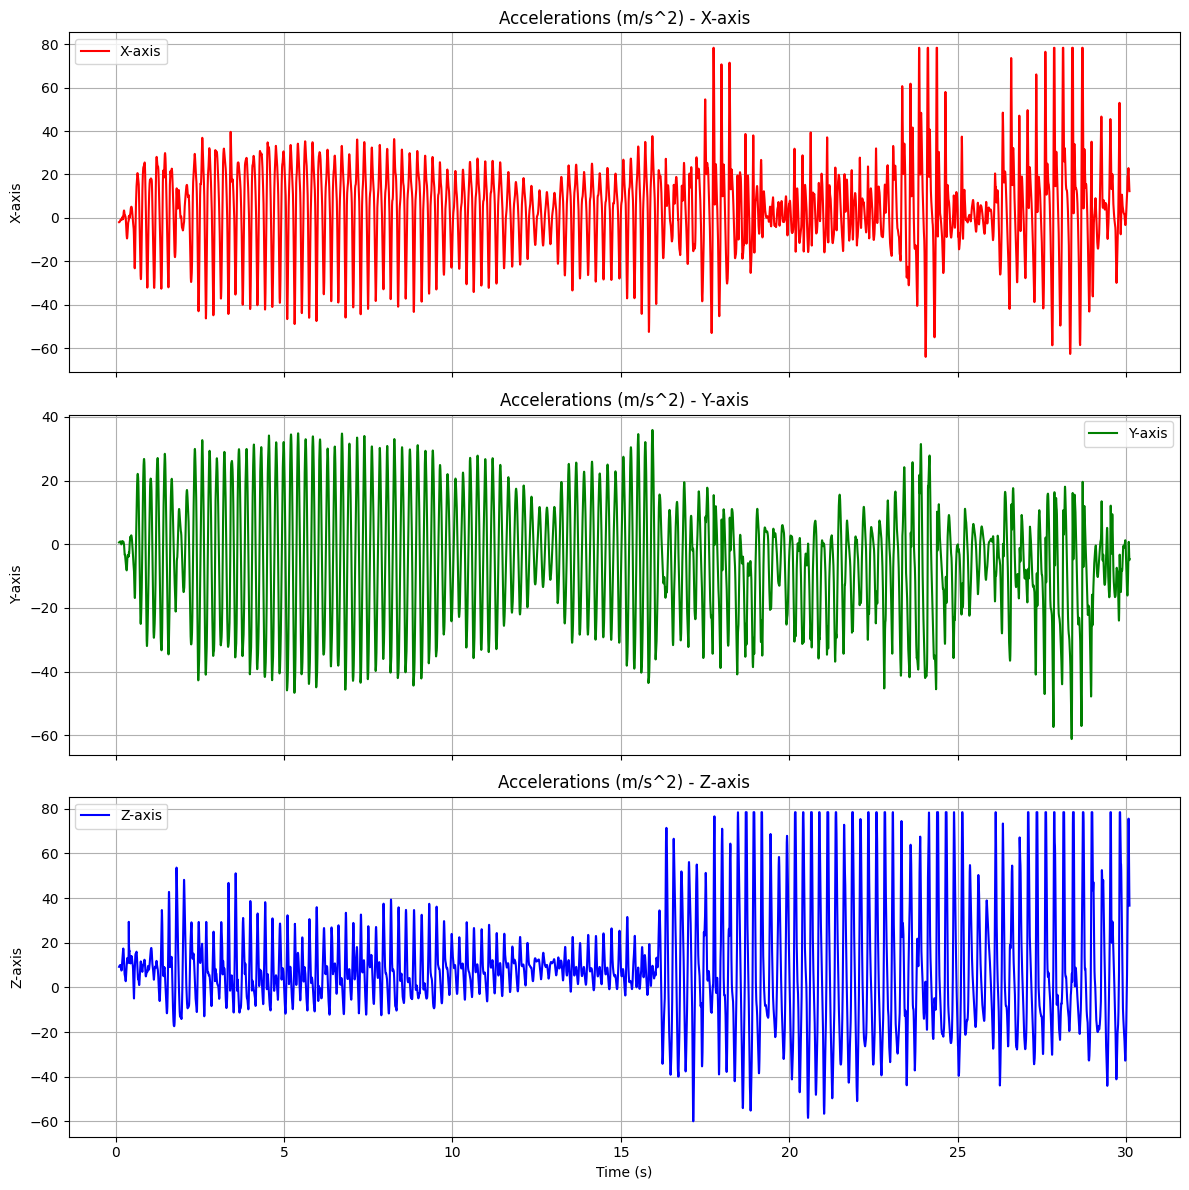

In [55]:
Elad_shake_accel = remove_rows_by_time(elad_accelerometer_and_gyroscope_30sec_shake_accelerometer, START_TIME_BUFFER, 30 + START_TIME_BUFFER)
Elad_shake_gyro = remove_rows_by_time(elad_accelerometer_and_gyroscope_30sec_shake_gyroscope, START_TIME_BUFFER, 30 + START_TIME_BUFFER)

Elad_shake = Sensor(name="Elad shake accelerometer")
Elad_shake.plot_time_series(Elad_shake_accel["Time (s)"].to_numpy(), Elad_shake_accel[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].to_numpy(), "Accelerations (m/s^2)", "Time (s)")


#### Q4.4

In [56]:
# Load experiment data
# Get the data for the accelerometer
f_up_300 = get_mean_accelerations(remove_rows_by_time(elad_accelerometer_and_gyroscope_300sec_aftershake_accelerometer, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
f_up_60 = get_mean_accelerations(remove_rows_by_time(elad_accelerometer_and_gyroscope_60sec_aftershake_accelerometer, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
f_up_5 = get_mean_accelerations(remove_rows_by_time(elad_accelerometer_and_gyroscope_5sec_aftershake_accelerometer, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

# Get the data for the gyroscopes
omega_up_300 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_300sec_aftershake_gyroscope, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
omega_up_60 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_60sec_aftershake_gyroscope, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
omega_up_5 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_5sec_aftershake_gyroscope, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

f_bias_300 = f_up_300 - np.array([[0],[0], [g_true]])
f_bias_60 = f_up_60 - np.array([[0],[0], [g_true]])
f_bias_5 = f_up_5 - np.array([[0],[0], [g_true]])

omega_bias_300 = omega_up_300 - np.array([[0],[0], [omega_true]])
omega_bias_60 = omega_up_60 - np.array([[0],[0], [omega_true]])
omega_bias_5 = omega_up_5 - np.array([[0],[0], [omega_true]])

print(f"Stats for 300sec:")
print(f"accel bias x: {f_bias_300[0][0]}\naccel bias y: {f_bias_300[1][0]}\naccel bias z: {f_bias_300[2][0]}")
print(f"gyro bias x: {omega_bias_300[0][0]}\ngyro bias y: {omega_bias_300[1][0]}\ngyro bias z: {omega_bias_300[2][0]}")
print(f"Stats for 60sec:")
print(f"accel bias x: {f_bias_60[0][0]}\naccel bias y: {f_bias_60[1][0]}\naccel bias z: {f_bias_60[2][0]}")
print(f"gyro bias x: {omega_bias_60[0][0]}\ngyro bias y: {omega_bias_60[1][0]}\ngyro bias z: {omega_bias_60[2][0]}")
print(f"Stats for 5sec:")
print(f"accel bias x: {f_bias_5[0][0]}\naccel bias y: {f_bias_5[1][0]}\naccel bias z: {f_bias_5[2][0]}")
print(f"gyro bias x: {omega_bias_5[0][0]}\ngyro bias y: {omega_bias_5[1][0]}\ngyro bias z: {omega_bias_5[2][0]}")


Stats for 300sec:
accel bias x: -0.23904306682947662
accel bias y: -0.11074701181112538
accel bias z: 0.06854053375763414
gyro bias x: 1.3336399636771285e-07
gyro bias y: -1.0188193643490533e-07
gyro bias z: -4.9458116729816514e-05
Stats for 60sec:
accel bias x: -0.23713002487988113
accel bias y: -0.10854405771159785
accel bias z: 0.07067989691141463
gyro bias x: 7.029849593070521e-06
gyro bias y: -3.6955340404694357e-06
gyro bias z: -4.5681497082862704e-05
Stats for 5sec:
accel bias x: -0.2512495692984959
accel bias y: -0.10644171397989326
accel bias z: 0.07068905148811311
gyro bias x: 0.0001373739527037943
gyro bias y: -2.008001827882096e-05
gyro bias z: -1.527126702176494e-05


## Ben

In [57]:
load_data("Ben")

Loaded ben_acceleration_with_g_right_5 in Acceleration with g RIGHT 5
Loaded ben_accelerometer_and_gyroscope_60_accelerometer in Accelerometer and Gyroscope 60
Loaded ben_accelerometer_and_gyroscope_60_gyroscope in Accelerometer and Gyroscope 60
Loaded ben_acceleration_with_g_stand_5 in Acceleration with g STAND 5
Loaded ben_accelerometer_and_gyroscope_aftershake_300_accelerometer in Accelerometer and Gyroscope afterShake_300
Loaded ben_accelerometer_and_gyroscope_aftershake_300_gyroscope in Accelerometer and Gyroscope afterShake_300
Loaded ben_acceleration_with_g_60 in Acceleration with g 60
Loaded ben_acceleration_with_g_300_flip in Acceleration with g 300_flip
Loaded ben_acceleration_with_g_stand_60 in Acceleration with g STAND 60
Loaded ben_acceleration_with_g_left_300 in Acceleration with g LEFT 300
Loaded ben_acceleration_with_g_right_300 in Acceleration with g RIGHT 300
Loaded ben_accelerometer_and_gyroscope_aftershake_60_accelerometer in Accelerometer and Gyroscope afterShake_6

### Accelerometers

In [58]:
# 5sec experiment
fz_up_5sec = get_mean_accelerations(ben_acceleration_with_g_5)
fz_down_5sec = get_mean_accelerations(ben_acceleration_with_g_5_flip)
fx_up_5sec = get_mean_accelerations(ben_acceleration_with_g_left_5)
fx_down_5sec = get_mean_accelerations(ben_acceleration_with_g_right_5)
fy_up_5sec = get_mean_accelerations(ben_acceleration_with_g_stand_5)
fy_down_5sec = get_mean_accelerations(ben_acceleration_with_g_stand_5_flip)

# 60sec experiment
fz_up_60sec = get_mean_accelerations(ben_acceleration_with_g_60)
fz_down_60sec = get_mean_accelerations(ben_acceleration_with_g_60_flip)
fx_up_60sec = get_mean_accelerations(ben_acceleration_with_g_left_60)
fx_down_60sec = get_mean_accelerations(ben_acceleration_with_g_right_60)
fy_up_60sec = get_mean_accelerations(ben_acceleration_with_g_stand_60)
fy_down_60sec = get_mean_accelerations(ben_acceleration_with_g_stand_60_flip)

# 300sec experiment
fz_up_300sec = get_mean_accelerations(ben_acceleration_with_g_300)
fz_down_300sec = get_mean_accelerations(ben_acceleration_with_g_300_flip)
fx_up_300sec = get_mean_accelerations(ben_acceleration_with_g_left_300)
fx_down_300sec = get_mean_accelerations(ben_acceleration_with_g_right_300)
fy_up_300sec = get_mean_accelerations(ben_acceleration_with_g_stand_300)
fy_down_300sec = get_mean_accelerations(ben_acceleration_with_g_stand_300_flip)

In [59]:
g_true = 9.807 # m/s^2

# create sensors objects for the accelerometers for the different time periods (5, 60, 300 seconds)
Ben_acc_300 = Accelerometer(name="Ben accelerometer 300 sec")
Ben_acc_300.set_calibration_data(
    fx_up=fx_up_300sec, fx_down=fx_down_300sec, 
    fy_up=fy_up_300sec, fy_down=fy_down_300sec, 
    fz_up=fz_up_300sec, fz_down=fz_down_300sec, 
    g=g_true)

Ben_acc_60 = Accelerometer(name="Ben accelerometer 60 sec")
Ben_acc_60.set_calibration_data(
    fx_up=fx_up_60sec, fx_down=fx_down_60sec, 
    fy_up=fy_up_60sec, fy_down=fy_down_60sec, 
    fz_up=fz_up_60sec, fz_down=fz_down_60sec, 
    g=g_true)

Ben_acc_5 = Accelerometer(name="Ben accelerometer 5 sec")
Ben_acc_5.set_calibration_data(
    fx_up=fx_up_5sec, fx_down=fx_down_5sec, 
    fy_up=fy_up_5sec, fy_down=fy_down_5sec, 
    fz_up=fz_up_5sec, fz_down=fz_down_5sec, 
    g=g_true)


In [60]:
# Compute bias and scale factor for each accelerometer
bias_300 = Ben_acc_300.compute_bias()
scale_factor_300 = Ben_acc_300.compute_scale_factor()

bias_60 = Ben_acc_60.compute_bias()
scale_factor_60 = Ben_acc_60.compute_scale_factor()

bias_5 = Ben_acc_5.compute_bias()
scale_factor_5 = Ben_acc_5.compute_scale_factor()

# Print stats for each accelerometer
print(f"Stats for {Ben_acc_300.get_sensor_name()} sensors:")
print(f"bias x: {bias_300[0][0]}\nbias y: {bias_300[1][0]}\nbias z: {bias_300[2][0]}")
print(f"scale factor x: {scale_factor_300[0,0]}\nscale factor y: {scale_factor_300[1,1]}\nscale factor z: {scale_factor_300[2,2]}")

print(f"Stats for {Ben_acc_60.get_sensor_name()} sensors:")
print(f"bias x: {bias_60[0][0]}\nbias y: {bias_60[1][0]}\nbias z: {bias_60[2][0]}")
print(f"scale factor x: {scale_factor_60[0,0]}\nscale factor y: {scale_factor_60[1,1]}\nscale factor z: {scale_factor_60[2,2]}")

print(f"Stats for {Ben_acc_5.get_sensor_name()} sensors:")
print(f"bias x: {bias_5[0][0]}\nbias y: {bias_5[1][0]}\nbias z: {bias_5[2][0]}")
print(f"scale factor x: {scale_factor_5[0,0]}\nscale factor y: {scale_factor_5[1,1]}\nscale factor z: {scale_factor_5[2,2]}")


Stats for Ben accelerometer 300 sec sensors:
bias x: 0.07104652421503133
bias y: -0.29460292006660715
bias z: 0.0544890301794716
scale factor x: 0.006733391143199676
scale factor y: 0.006733225078389019
scale factor z: 0.0015967559456221902
Stats for Ben accelerometer 60 sec sensors:
bias x: 0.06749924307082633
bias y: -0.2968754285847526
bias z: 0.006479777906631234
scale factor x: 0.006733613440729232
scale factor y: 0.006578694715697894
scale factor z: 0.006375467223121591
Stats for Ben accelerometer 5 sec sensors:
bias x: 0.06584400520497802
bias y: -0.29462508303169876
bias z: 0.0011682892849353976
scale factor x: 0.0072938959132336206
scale factor y: 0.00662982155359589
scale factor z: 0.006998875375666723


#### Now assume misalignments

In [61]:
# Calculate the errors matrix M = [SF + M | b]
M300 = Ben_acc_300.compute_M_errors_matrix()
M60 = Ben_acc_60.compute_M_errors_matrix()
M5 = Ben_acc_5.compute_M_errors_matrix()
print(f"Stats for {Ben_acc_300.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M300}")
print(f"Stats for {Ben_acc_60.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M60}")
print(f"Stats for {Ben_acc_5.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M5}")

Stats for Ben accelerometer 300 sec sensors:
M Matrix:
[[ 0.0067 -0.0024 -0.01    0.0499]
 [ 0.0004  0.0067  0.0029 -0.2159]
 [ 0.0383 -0.0022  0.0016 -0.1319]]
Stats for Ben accelerometer 60 sec sensors:
M Matrix:
[[ 0.0067 -0.0057 -0.0055  0.0866]
 [-0.0022  0.0066  0.0055 -0.212 ]
 [ 0.0289 -0.0023  0.0064 -0.1243]]
Stats for Ben accelerometer 5 sec sensors:
M Matrix:
[[ 0.0073  0.0018 -0.0012  0.0464]
 [ 0.0015  0.0066  0.0079 -0.2153]
 [ 0.0381 -0.0005  0.007  -0.1426]]


#### Q2.6 - position error in z axis

In [62]:
position_error = lambda time, bias : (0.5*bias*time**2)

# according to the no misalignment assumption
print("No misalignment case position error:")
print(f"Position error Z after 300sec: {position_error(300, bias_300[2][0])}")
print(f"Position error Z after 60sec: {position_error(60, bias_60[2][0])}")
print(f"Position error Z after 5sec: {position_error(5, bias_5[2][0])}\n")

# according the misalignment case
print("Misalignment case position error:")
print(f"Position error Z after 300sec: {position_error(300, M300[2,3])}")
print(f"Position error Z after 60sec: {position_error(60, M60[2,3])}")
print(f"Position error Z after 5sec: {position_error(5, M5[2,3])}")


No misalignment case position error:
Position error Z after 300sec: 2452.006358076222
Position error Z after 60sec: 11.663600231936222
Position error Z after 5sec: 0.01460361606169247

Misalignment case position error:
Position error Z after 300sec: -5936.185691114082
Position error Z after 60sec: -223.66316042900857
Position error Z after 5sec: -1.7824009943786585


#### Q2.7

In [63]:
Ben_acc_avg = Accelerometer(name="Ben accelerometer average")
fx_up_avg = (fx_up_300sec + fx_up_60sec + fx_up_5sec) / 3
fx_down_avg = (fx_down_300sec + fx_down_60sec + fx_down_5sec) / 3
fy_up_avg = (fy_up_300sec + fy_up_60sec + fy_up_5sec) / 3
fy_down_avg = (fy_down_300sec + fy_down_60sec + fy_down_5sec) / 3
fz_up_avg = (fz_up_300sec + fz_up_60sec + fz_up_5sec) / 3
fz_down_avg = (fz_down_300sec + fz_down_60sec + fz_down_5sec) / 3

Ben_acc_avg.set_calibration_data(
    fx_up=fx_up_avg, fx_down=fx_down_avg, 
    fy_up=fy_up_avg, fy_down=fy_down_avg, 
    fz_up=fz_up_avg, fz_down=fz_down_avg, 
    g=g_true)

bias_avg = Ben_acc_avg.compute_bias()

print(f"Stats for {Ben_acc_avg.get_sensor_name()} sensors:")
print(f"bias x: {bias_avg[0][0]}\nbias y: {bias_avg[1][0]}\nbias z: {bias_avg[2][0]}")

Stats for Ben accelerometer average sensors:
bias x: 0.06812992416361308
bias y: -0.2953678105610189
bias z: 0.020712365790346077


### Gyroscopes

#### Q3.1

In [64]:
omega_earth = 7.292115*(10**-5) # m/s^2
latitude_in_haifa = 32.794046 # degrees
omega_true = omega_earth*np.cos(90-latitude_in_haifa)

# 5sec experiment
wz_up_5sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_5)
wz_down_5sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_5_flip)

# 60sec experiment
wz_up_60sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_60)
wz_down_60sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_60_flip)

# create sensors objects for the gyros for the different time periods (5, 60 seconds)
Ben_gyr_60 = Gyroscope(name="Ben gyroscope 60 sec")
Ben_gyr_5 = Gyroscope(name="Ben gyroscope 5 sec")

bias_60 = Ben_gyr_60.calc_bias(wz_up_60sec, wz_down_60sec)
scale_factor_60 = Ben_gyr_60.calc_scale_factor(wz_up_60sec, wz_down_60sec, omega_true)
bias_5 = Ben_gyr_5.calc_bias(wz_up_5sec, wz_down_5sec)
scale_factor_5 = Ben_gyr_5.calc_scale_factor(wz_up_5sec, wz_down_5sec, omega_true)

# Print stats for each gyroscope
print(f"Stats for {Ben_gyr_60.get_sensor_name()} sensors:")
print(f"bias z: {bias_60[0][0]}")
print(f"scale factor z: {scale_factor_60[0][0]}\n")

print(f"Stats for {Ben_gyr_5.get_sensor_name()} sensors:")
print(f"bias z: {bias_5[0][0]}")
print(f"scale factor z: {scale_factor_5[0][0]}")



Stats for Ben gyroscope 60 sec sensors:
bias z: -4.28543752190072e-05
scale factor z: 3.7161539570251527

Stats for Ben gyroscope 5 sec sensors:
bias z: 0.00022642136611590298
scale factor z: 1.0635740954738346


#### Q3.2

In [65]:
Ben_gyr_32_scenario = Gyroscope(name="Ben gyroscope Q3.2 scenario")

ben_partA_32_scenario = remove_rows_by_time(ben_gyroscope_rotation_rate_32_scenario, 0, 60)
ben_partB_32_scenario = remove_rows_by_time(ben_gyroscope_rotation_rate_32_scenario, 60, 120)

bias = Ben_gyr_32_scenario.calc_bias(get_mean_gyroscopes(ben_partA_32_scenario), get_mean_gyroscopes(ben_partB_32_scenario))
scale_factor = Ben_gyr_32_scenario.calc_scale_factor(get_mean_gyroscopes(ben_partA_32_scenario), get_mean_gyroscopes(ben_partB_32_scenario), omega_true)

print("{}\nBias: \n{}\nScale Factor \n{}".format(Ben_gyr_32_scenario.get_sensor_name(), bias[2][0], scale_factor[2][0]))


Ben gyroscope Q3.2 scenario
Bias: 
-0.0011621045654583533
Scale Factor 
-17.410514962255352


#### Q3.3

In [66]:
# take average of measurements
wz_up_60sec, wz_down_60sec
wz_up_5sec, wz_down_5sec, omega_true
Ben_gyr_average = Gyroscope(name="Ben gyroscope average")
bias_average = Ben_gyr_average.calc_bias((wz_up_60sec + wz_up_5sec)/2, (wz_down_60sec + wz_down_5sec)/2)
scale_factor_average = Ben_gyr_average.calc_scale_factor((wz_up_60sec + wz_up_5sec)/2, (wz_down_60sec + wz_down_5sec)/2, omega_true)

print(f"Stats for {Ben_gyr_average.get_sensor_name()} sensors:")
print(f"bias z: {bias_average[0][0]}")
print(f"scale factor z: {scale_factor_average[0][0]}")

Stats for Ben gyroscope average sensors:
bias z: 9.178349544844788e-05
scale factor z: 2.3898640262494935


### Accelerometers and Gyroscopes

#### Q4.2

In [69]:
# Load experiment data
# Get the data for the accelerometer
f_up_300 = get_mean_accelerations(remove_rows_by_time(ben_accelerometer_and_gyroscope_300_accelerometer, 0, 300 + 0))
f_up_60 = get_mean_accelerations(remove_rows_by_time(ben_accelerometer_and_gyroscope_60_accelerometer, 0, 60 + 0))
f_up_5 = get_mean_accelerations(remove_rows_by_time(ben_accelerometer_and_gyroscope_5_accelerometer, 0, 5 + 0))

# Get the data for the gyroscopes
omega_up_300 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_300sec_gyroscope, 0, 300 + 0))
omega_up_60 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_60sec_gyroscope, 0, 60 + 0))
omega_up_5 = get_mean_gyroscopes(remove_rows_by_time(elad_accelerometer_and_gyroscope_5sec_gyroscope, 0, 5 + 0))

f_bias_300 = f_up_300 - np.array([[0],[0], [g_true]])
f_bias_60 = f_up_60 - np.array([[0],[0], [g_true]])
f_bias_5 = f_up_5 - np.array([[0],[0], [g_true]])

omega_bias_300 = omega_up_300 - np.array([[0],[0], [omega_true]])
omega_bias_60 = omega_up_60 - np.array([[0],[0], [omega_true]])
omega_bias_5 = omega_up_5 - np.array([[0],[0], [omega_true]])

print(f"Stats for 300sec:")
print(f"accel bias x: {f_bias_300[0][0]}\naccel bias y: {f_bias_300[1][0]}\naccel bias z: {f_bias_300[2][0]}")
print(f"gyro bias x: {omega_bias_300[0][0]}\ngyro bias y: {omega_bias_300[1][0]}\ngyro bias z: {omega_bias_300[2][0]}")
print(f"Stats for 60sec:")
print(f"accel bias x: {f_bias_60[0][0]}\naccel bias y: {f_bias_60[1][0]}\naccel bias z: {f_bias_60[2][0]}")
print(f"gyro bias x: {omega_bias_60[0][0]}\ngyro bias y: {omega_bias_60[1][0]}\ngyro bias z: {omega_bias_60[2][0]}")
print(f"Stats for 5sec:")
print(f"accel bias x: {f_bias_5[0][0]}\naccel bias y: {f_bias_5[1][0]}\naccel bias z: {f_bias_5[2][0]}")
print(f"gyro bias x: {omega_bias_5[0][0]}\ngyro bias y: {omega_bias_5[1][0]}\ngyro bias z: {omega_bias_5[2][0]}")


Stats for 300sec:
accel bias x: -0.1307379056113057
accel bias y: -0.1376687090805798
accel bias z: 0.07557392346387637
gyro bias x: 3.266487194906544e-06
gyro bias y: 7.164116340860496e-07
gyro bias z: -5.0029249740353186e-05
Stats for 60sec:
accel bias x: -0.13710338568623232
accel bias y: -0.13795779402887876
accel bias z: 0.07576855625685752
gyro bias x: 9.415773589075853e-06
gyro bias y: -7.705791696242657e-06
gyro bias z: -4.8621716423048166e-05
Stats for 5sec:
accel bias x: -0.13091439729510324
accel bias y: -0.1358776804171583
accel bias z: 0.07436988991494609
gyro bias x: 0.00014452544384240614
gyro bias y: -9.382269945647234e-05
gyro bias z: -0.00010197997907665838


#### Q4.3

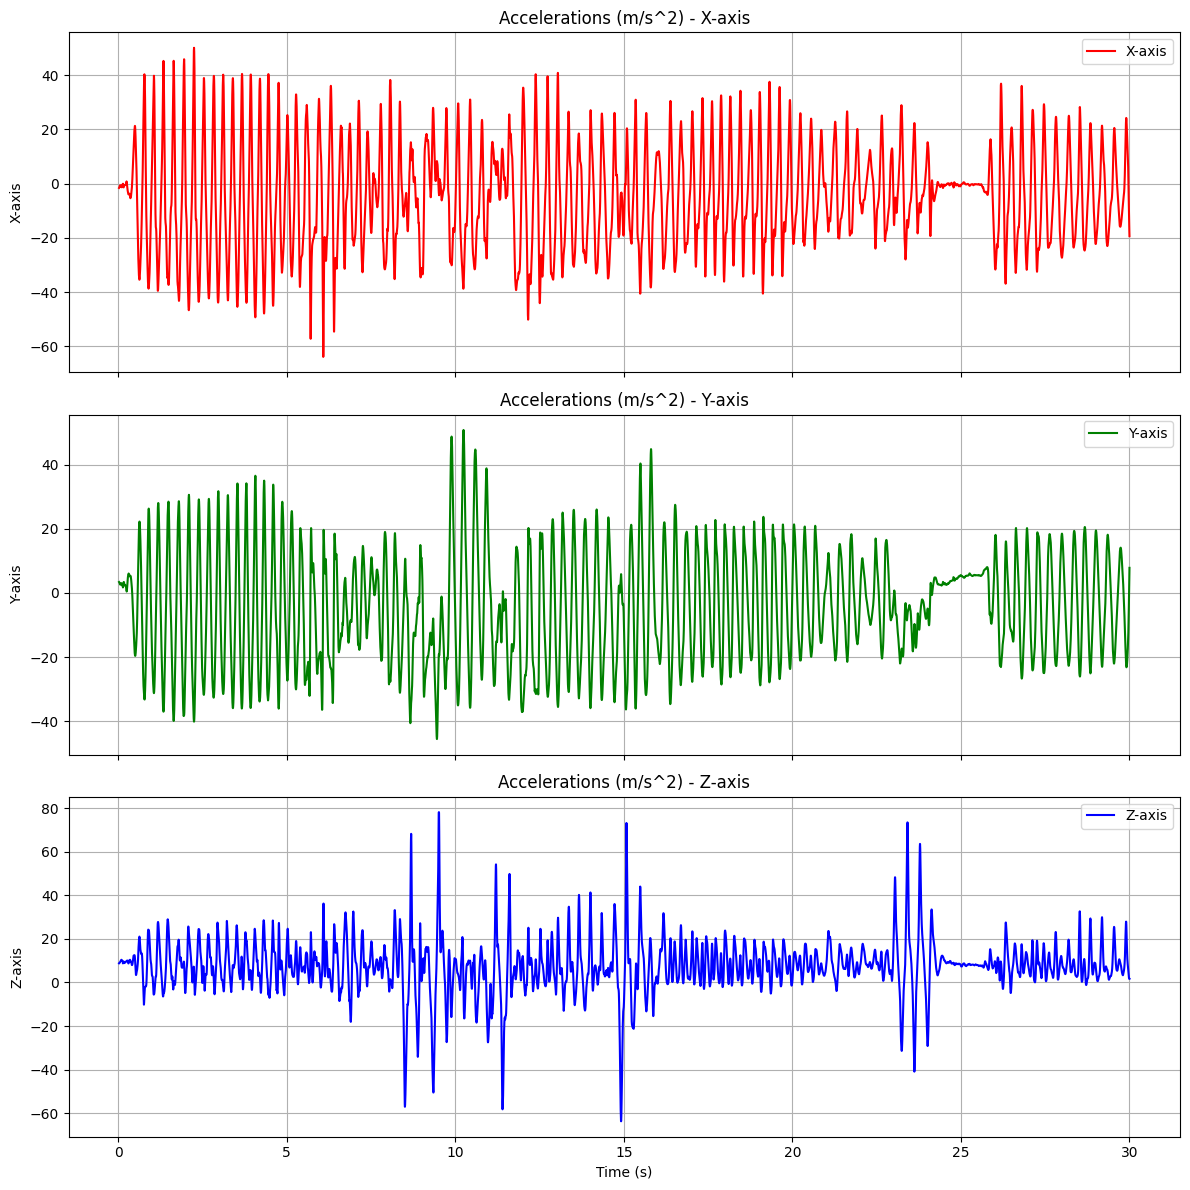

In [70]:
Ben_shake_accel = remove_rows_by_time(ben_accelerometer_and_gyroscope_shake_accelerometer, 0, 30 + 0)
Ben_shake_gyro = remove_rows_by_time(ben_accelerometer_and_gyroscope_shake_gyroscope, 0, 30 + 0)

Ben_shake = Sensor(name="Ben shake accelerometer")
Ben_shake.plot_time_series(Ben_shake_accel["Time (s)"].to_numpy(), Ben_shake_accel[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].to_numpy(), "Accelerations (m/s^2)", "Time (s)")


#### Q4.4

In [71]:
# Load experiment data
# Get the data for the accelerometer
f_up_300 = get_mean_accelerations(remove_rows_by_time(ben_accelerometer_and_gyroscope_aftershake_300_accelerometer, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
f_up_60 = get_mean_accelerations(remove_rows_by_time(ben_accelerometer_and_gyroscope_aftershake_60_accelerometer, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
f_up_5 = get_mean_accelerations(remove_rows_by_time(ben_accelerometer_and_gyroscope_aftershake_5_accelerometer, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

# Get the data for the gyroscopes
omega_up_300 = get_mean_gyroscopes(remove_rows_by_time(ben_accelerometer_and_gyroscope_aftershake_300_gyroscope, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
omega_up_60 = get_mean_gyroscopes(remove_rows_by_time(ben_accelerometer_and_gyroscope_aftershake_60_gyroscope, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
omega_up_5 = get_mean_gyroscopes(remove_rows_by_time(ben_accelerometer_and_gyroscope_aftershake_5_gyroscope, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

f_bias_300 = f_up_300 - np.array([[0],[0], [g_true]])
f_bias_60 = f_up_60 - np.array([[0],[0], [g_true]])
f_bias_5 = f_up_5 - np.array([[0],[0], [g_true]])

omega_bias_300 = omega_up_300 - np.array([[0],[0], [omega_true]])
omega_bias_60 = omega_up_60 - np.array([[0],[0], [omega_true]])
omega_bias_5 = omega_up_5 - np.array([[0],[0], [omega_true]])

print(f"Stats for 300sec:")
print(f"accel bias x: {f_bias_300[0][0]}\naccel bias y: {f_bias_300[1][0]}\naccel bias z: {f_bias_300[2][0]}")
print(f"gyro bias x: {omega_bias_300[0][0]}\ngyro bias y: {omega_bias_300[1][0]}\ngyro bias z: {omega_bias_300[2][0]}")
print(f"Stats for 60sec:")
print(f"accel bias x: {f_bias_60[0][0]}\naccel bias y: {f_bias_60[1][0]}\naccel bias z: {f_bias_60[2][0]}")
print(f"gyro bias x: {omega_bias_60[0][0]}\ngyro bias y: {omega_bias_60[1][0]}\ngyro bias z: {omega_bias_60[2][0]}")
print(f"Stats for 5sec:")
print(f"accel bias x: {f_bias_5[0][0]}\naccel bias y: {f_bias_5[1][0]}\naccel bias z: {f_bias_5[2][0]}")
print(f"gyro bias x: {omega_bias_5[0][0]}\ngyro bias y: {omega_bias_5[1][0]}\ngyro bias z: {omega_bias_5[2][0]}")


Stats for 300sec:
accel bias x: -0.08500498814075205
accel bias y: -0.20837262572131224
accel bias z: 0.076001492632912
gyro bias x: 1.3954150122682186e-05
gyro bias y: -8.225634009347222e-05
gyro bias z: -9.760678316949434e-05
Stats for 60sec:
accel bias x: -0.03219141456767139
accel bias y: -0.19430368585251528
accel bias z: 0.08016421872519253
gyro bias x: 0.00016449912678061763
gyro bias y: -0.0004885632099235558
gyro bias z: -0.00024226330723924427
Stats for 5sec:
accel bias x: -0.04228229050548053
accel bias y: -0.1945151651677674
accel bias z: 0.07710598227599696
gyro bias x: 0.00019644052300887136
gyro bias y: -0.00053370111020207
gyro bias z: -0.0006192771878536636
